<a href="https://colab.research.google.com/github/Vishu26/Statistical-Communication-Labs/blob/master/LAB_5_Covariance_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.image as mpimg

## Three different Gaussian random variables, i.e., $X1$, $X2$ and $X3$ with $0$ mean and $1$ variance. 

In [4]:
M = 2000
X1 = np.random.normal(0, 1, M)
X2 = np.random.normal(0, 1, M)#write code here
X3 = np.random.normal(0, 1, M)#write code here
X = np.c_[X1, X2, X3]
X.shape

(2000, 3)

## <font color='red'>1. Compute the covariance matrix of  $X1$, $X2$ and $X3$. Covariance matrix (CV) $$CV = \begin{bmatrix} cov(X1,X1) & cov(X1,X2)& cov(X1,X3)\\cov(X2,X1) & cov(X2,X2)& cov(X2,X3)\\cov(X3,X1) & cov(X3,X2)& cov(X3,X3)\end{bmatrix}.$$ Here, $$cov(X,Y)=E[XY]-E[X]E[Y]$$</font> 


In [0]:
def covmat(data_mat):

    sam = data_mat.shape[0]
    var = data_mat.shape[1]
    CV = np.zeros((var, var))
    for i in range(var):
      for j in range(i, var):
        mu1 = np.mean(data_mat[:, i])
        mu2 = np.mean(data_mat[:, j])
        if(i==j):
          X = data_mat[:,i] - mu1
          CV[i,j] = np.mean(X.reshape(1, sam).dot(X.reshape(sam, 1))) / sam
        else:
          X = data_mat[:,i] - mu1
          Y = data_mat[:,j] - mu2
          CV[i,j] = np.mean(X.reshape(1, sam).dot(Y.reshape(sam, 1))) / sam
          CV[j, i] = CV[i,j]
    return CV

[[ 1.00806505 -0.02746221  0.04900039]
 [-0.02746221  0.97961669 -0.01881115]
 [ 0.04900039 -0.01881115  1.00722347]]


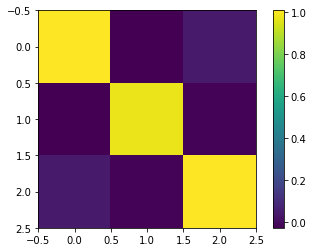

In [18]:
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>2. Generate three random variables as $X1$, $X2$ and $X1+X2$. Compute the covariance matrix</font> 

[[1.02993779 0.01602316 1.04596095]
 [0.01602316 0.97805098 0.99407414]
 [1.04596095 0.99407414 2.0400351 ]]


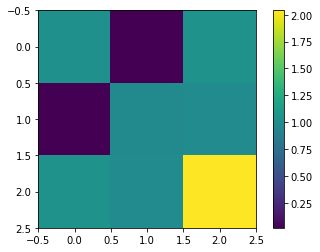

In [19]:
X1 =np.random.normal(0, 1, M)
X2 =np.random.normal(0, 1, M)
X3 = X1 + X2
X = np.c_[X1, X2, X3]
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>3. Generate covariance matrix of correlated data. Take face images as the data.</font> 

[[2842.34397415 1772.09264952 1296.35812308 1440.1269711  1440.1269711
   745.82859141  664.23417774]
 [1772.09264952 2345.2391852   945.74757173  928.27042199  928.27042199
   594.16624356  237.74714864]
 [1296.35812308  945.74757173 2002.36923601 1255.68066919 1255.68066919
   795.2471839   736.05473497]
 [1440.1269711   928.27042199 1255.68066919 2197.8056051  2197.8056051
   917.26893253  699.41633051]
 [1440.1269711   928.27042199 1255.68066919 2197.8056051  2197.8056051
   917.26893253  699.41633051]
 [ 745.82859141  594.16624356  795.2471839   917.26893253  917.26893253
  1407.87791752  450.69255924]
 [ 664.23417774  237.74714864  736.05473497  699.41633051  699.41633051
   450.69255924 1715.95615042]]


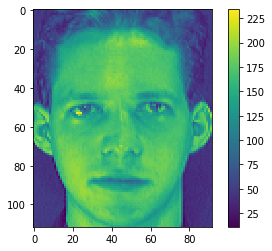

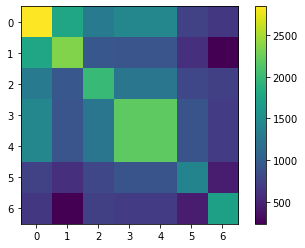

In [20]:
X1 = mpimg.imread('f1.pgm')
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X1 = X1.flatten()
X2 = mpimg.imread('f2.pgm').flatten()
X3 = mpimg.imread('f3.pgm').flatten()
X4 = mpimg.imread('f4.pgm').flatten()
X5 = mpimg.imread('f5.pgm').flatten()
X6 = mpimg.imread('f6.pgm').flatten()

X = np.c_[X1, X2, X3, X4, X4, X5, X6]
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>4. Show that data and noise are uncorrelated. Take Image files as your data and standard gaussian noise.</font> 

[[ 1.          0.68636406  0.54339369  0.5761928   0.5761928   0.37283632
   0.30076674 -0.0072012 ]
 [ 0.68636406  1.          0.43642496  0.408871    0.408871    0.32698807
   0.11851373 -0.01569282]
 [ 0.54339369  0.43642496  1.          0.59856661  0.59856661  0.47363911
   0.39708633 -0.00485891]
 [ 0.5761928   0.408871    0.59856661  1.          1.          0.52145826
   0.36015383  0.00907214]
 [ 0.5761928   0.408871    0.59856661  1.          1.          0.52145826
   0.36015383  0.00907214]
 [ 0.37283632  0.32698807  0.47363911  0.52145826  0.52145826  1.
   0.28996448 -0.00391231]
 [ 0.30076674  0.11851373  0.39708633  0.36015383  0.36015383  0.28996448
   1.          0.01558646]
 [-0.0072012  -0.01569282 -0.00485891  0.00907214  0.00907214 -0.00391231
   0.01558646  1.02314293]]


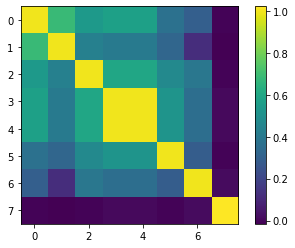

In [21]:
X1 = (X1-np.mean(X1))/np.std(X1) # FOR NORMALIZATION TO ZERO MEAN ONE VARIANCE
X2 = (X2-np.mean(X2))/np.std(X2)#write code here
X3 = (X3-np.mean(X3))/np.std(X3)#write code here
X4 = (X4-np.mean(X4))/np.std(X4)#write code here
X5 = (X5-np.mean(X5))/np.std(X5)#write code here
X6 = (X6-np.mean(X6))/np.std(X6)#write code here

XN = np.random.normal(0, 1, m*n)#write code here
X = np.c_[X1, X2, X3, X4, X4, X5, X6, XN]#write code here
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## Consider $X1$,$X2$ and $X3$ uniform random variables

[[ 8.21569615 -0.01691715 -0.18716221]
 [-0.01691715  8.17878678  0.3589574 ]
 [-0.18716221  0.3589574   8.44494503]]


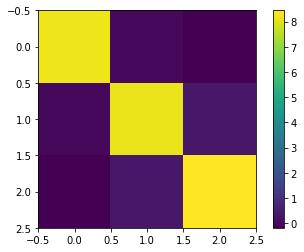

In [23]:
X1 = np.random.uniform(0, 10, M)
X2 = np.random.uniform(0, 10, M)
X3 = np.random.uniform(0, 10, M)
X = np.c_[X1, X2, X3]
CV = covmat(X)
print(CV)
fig=plt.figure()
plt.imshow(CV)
plt.colorbar()

## <font color='red'>5. Verify the properties of the covariance matrix.</font>

### <font color='red'> a) Symmetric,i.e.,$C_X = C_X^T.$ </font> 

In [24]:
CV == CV.T

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### <font color='red'> b) Its eigenvalues are greater than equal to zero</font>

In [25]:
from numpy import linalg as LA
LA.eig(CV)[0]

array([8.74600535, 8.19488409, 7.89853852])

### <font color='red'> c) It is positive semi-definite, i.e., for any real valued vector $a$,$$a^TC_Xa\geq0$$ </font>

In [26]:
a = np.random.rand(np.size(CV,0),1)
(a.T.dot(CV)).dot(a)
#write code here

array([[10.59914008]])

## <font color='red'>6. Compute correlation coefficient matrix.</font>
Hint: you may require np.mean,np.prod,and np.std

$$\rho_{XY}=\frac{COV(X,Y)}{\sqrt{\sigma_X\sigma_Y}}$$

In [0]:
def corr(data_mat):
    sam = data_mat.shape[0]
    var = data_mat.shape[1]
    CR = np.zeros((var, var))
    CV = covmat(data_mat)
    for i in range(var):
      for j in range(i, var):
        if(i==j):
          CR[i,j] = 1
        else:
          CR[i,j] = CV[i,j] / np.sqrt(CV[i,i]*CV[j,j])
          CR[j,i] = CR[i,j]

    return CR

[[ 1.         -0.00206377 -0.02246972]
 [-0.00206377  1.          0.04319168]
 [-0.02246972  0.04319168  1.        ]]


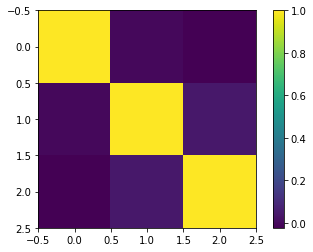

In [32]:
CR = corr(X)
print(CR)
fig=plt.figure()
plt.imshow(CR)
plt.colorbar()